REGRESI :
Algoritma berbasis linear regression
- Ridge Regression
- Support Vector Regressor

In [1]:
import pandas as pd
import numpy as np

df_properti = pd.read_csv(r'D:\Kuliah\SEMESTER 5\ML\UTS\Projek UTS PMDPM_A_H2O\Dataset UTS_Gasal 2425.csv')
df_properti.head(10)



,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


In [2]:
df_properti2 = df_properti.drop(['category'], axis=1)
df_properti2.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4


In [3]:
df_properti2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasstorageroom     10000 non-null  object 
 15  hasguestroom       10000 non-null  int64  
 16  price              1000

In [4]:
df_properti2.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,28774.37535,28.816696,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


In [5]:
print("data null \n", df_properti2.isnull().sum())
print("\ndata kosong \n", df_properti2.empty)
print("\ndata nan \n", df_properti2.isna().sum())

data null 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
dtype: int64

data kosong 
 False

data nan 
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
dtype: int64


In [6]:
print("Sebelum Pengecekan data duplikat, ", df_properti2.shape)
df_properti3=df_properti2.drop_duplicates(keep='last')
print("Setelah Pengecekan data duplikat, ", df_properti3.shape)

Sebelum Pengecekan data duplikat,  (10000, 17)
Setelah Pengecekan data duplikat,  (10000, 17)


In [15]:
from sklearn.model_selection import train_test_split

X_regress = df_properti3.drop(columns=['price'], axis=1)
y_regress = df_properti3['price']

X_train_properti, X_test_properti, y_train_properti, y_test_properti = train_test_split(X_regress, y_regress, test_size=0.25, random_state=72)

print(X_train_properti.shape)
print(X_test_properti.shape)
print(y_train_properti.shape)
print(y_test_properti.shape)

(7500, 16)
(2500, 16)
(7500,)
(2500,)


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

kolom_kategori=['hasyard','haspool','isnewbuilt','hasstormprotector','hasstorageroom']

transform = make_column_transformer(
    (OneHotEncoder(), kolom_kategori), remainder='passthrough'
)

In [10]:
x_train_enc=transform.fit_transform(X_train_properti)
x_test_enc=transform.transform(X_test_properti)

df_train_enc = pd.DataFrame(x_train_enc, columns=transform.get_feature_names_out())
df_test_enc = pd.DataFrame(x_test_enc, columns=transform.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,22.0,19.0,71247.0,1.0,3.0,1996.0,3856.0,4186.0,765.0,4.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,32.0,26.0,90052.0,2.0,2.0,2004.0,8033.0,8013.0,983.0,9.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,78.0,57.0,10331.0,10.0,10.0,2019.0,3202.0,2431.0,787.0,10.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,98.0,84.0,8864.0,6.0,1.0,1990.0,5400.0,3533.0,875.0,6.0
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,19.0,84.0,82241.0,4.0,6.0,1995.0,8498.0,7376.0,985.0,5.0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,82.0,25.0,99585.0,4.0,1.0,2011.0,637.0,8932.0,878.0,7.0
6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,41.0,1.0,85611.0,4.0,6.0,1994.0,7386.0,7266.0,805.0,9.0
7,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,22.0,57.0,79008.0,1.0,6.0,2006.0,1475.0,7576.0,276.0,10.0
8,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,78.0,55.0,64053.0,1.0,2.0,2009.0,5454.0,7380.0,787.0,2.0
9,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,19.0,85.0,55537.0,10.0,8.0,2000.0,5004.0,7171.0,108.0,9.0


In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

pipe_Ridge = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('reg', Ridge())
])

param_grid_Ridge = {
    'reg__alpha': [0.01, 0.1, 1, 10, 100],
    'feature_selection__k': np.arange(1,20)
}

GSCV_RR = GridSearchCV(pipe_Ridge, param_grid_Ridge, cv=5, scoring='neg_mean_squared_error', error_score='raise')

GSCV_RR.fit(x_train_enc, y_train_properti)

print("Best model:{}".format(GSCV_RR.best_estimator_))
print("Ridge best parameters:{}".format(GSCV_RR.best_params_))
print("Koefisien/bobot:{}".format(GSCV_RR.best_estimator_.named_steps['reg'].coef_))
print("Intercept/bias:{}".format(GSCV_RR.best_estimator_.named_steps['reg'].intercept_))

Ridge_predict = GSCV_RR.predict(x_test_enc)

mse_Ridge = mean_squared_error(y_test_properti, Ridge_predict)
mae_Ridge = mean_absolute_error(y_test_properti, Ridge_predict)

print("Ridge Mean Squared Error (MSE):{}".format(mse_Ridge))
print("Ridge Mean Absolute Error (MAE):{}".format(mae_Ridge))
print("Ridge Root Mean Squared Error (RMSE):{}".format(np.sqrt(mse_Ridge)))


Best model:Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=18,
                             score_func=<function f_regression at 0x000002842B5A8FE0>)),
                ('reg', Ridge(alpha=0.01))])
Ridge best parameters:{'feature_selection__k': 18, 'reg__alpha': 0.01}
Koefisien/bobot:[-7.58021442e+02  7.58021441e+02 -7.49582654e+02  7.49582654e+02
  4.88960039e+01 -4.88960363e+01 -3.03938405e+01  3.03938405e+01
 -4.34626405e+00  4.34623239e+00  2.87646731e+06  1.56729667e+03
 -1.19875081e+01  1.43252853e+02 -6.69899153e+00 -4.83480756e+00
  2.48777674e+01 -8.35727399e+00]
Intercept/bias:4989238.000666667
Ridge Mean Squared Error (MSE):3667897.5327414596
Ridge Mean Absolute Error (MAE):1483.6207754128613
Ridge Root Mean Squared Error (RMSE):1915.1755879661425


In [18]:
df_results = pd.DataFrame(y_test_properti, columns=['price'])
df_results = pd.DataFrame(y_test_properti)
df_results['Ridge Prediction'] = Ridge_predict

df_results['Selisih_Price_RR'] = df_results['Ridge Prediction'] - df_results['price']

df_results.head(10)

,price,Ridge Prediction,Selisih_Price_RR
7619,2714670.6,2.716003e+06,1332.150296
5479,5714000.4,5.716484e+06,2483.645076
1356,7274269.9,7.274709e+06,438.618820
7560,4822319.0,4.824374e+06,2055.308907
3551,8780796.5,8.784101e+06,3304.056988
6215,743576.1,7.447270e+05,1150.850540
9718,4807525.4,4.806934e+06,-591.329495
2504,6647572.6,6.646035e+06,-1537.626336
9152,3957780.9,3.956017e+06,-1763.436764
8110,4661805.0,4.658478e+06,-3326.718218


In [19]:
df_results.describe()

,price,Ridge Prediction,Selisih_Price_RR
count,2.500000e+03,2.500000e+03,2500.000000
mean,5.006076e+06,5.006065e+06,-10.629318
std,2.880289e+06,2.880284e+06,1915.529235
min,1.443130e+04,1.646901e+04,-6439.028762
25%,2.512003e+06,2.508618e+06,-1176.090606
50%,5.095722e+06,5.096904e+06,-17.587803
75%,7.396514e+06,7.395103e+06,1164.627837
max,1.000294e+07,1.000122e+07,6232.170018


In [21]:
from sklearn.svm  import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

pipe_SVR = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('feature_selection', SelectKBest(score_func=f_regression)),
        ('reg', SVR(kernel='linear'))
        ])

param_grid_SVR = {
    'reg__C': [0.01, 0.1, 1, 10, 100],
    'reg__epsilon': [0.1, 0.2, 0.5, 1],
    'feature_selection__k': np.arange(1,20)
}

GSCV_SVR = GridSearchCV(pipe_SVR, param_grid_SVR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

GSCV_SVR.fit(x_train_enc, y_train_properti)

print("Best model:{}".format(GSCV_SVR.best_estimator_))
print("Ridge best parameters:{}".format(GSCV_SVR.best_params_))
print("Koefisien/bobot:{}".format(GSCV_SVR.best_estimator_.named_steps['reg'].coef_))
print("Intercept/bias:{}".format(GSCV_SVR.best_estimator_.named_steps['reg'].intercept_))

SVR_predict = GSCV_SVR.predict(x_test_enc)

mse_SVR = mean_squared_error(y_test_properti, SVR_predict)
mae_SVR = mean_absolute_error(y_test_properti, SVR_predict)

print("SVR Mean Squared Error (MSE):{}".format(mse_SVR))
print("SVR Mean Absolute Error (MAE):{}".format(mae_SVR))
print("SVR Root Mean Squared Error (RMSE):{}".format(np.sqrt(mse_SVR)))

Best model:Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=2,
                             score_func=<function f_regression at 0x000002842B5A8FE0>)),
                ('reg', SVR(C=100, kernel='linear'))])
Ridge best parameters:{'feature_selection__k': 2, 'reg__C': 100, 'reg__epsilon': 0.1}
Koefisien/bobot:[[647958.92070824  21714.67149088]]
Intercept/bias:[4985563.02448221]
SVR Mean Squared Error (MSE):4980030669523.993
SVR Mean Absolute Error (MAE):1929862.0391984528
SVR Root Mean Squared Error (RMSE):2231598.232102722


In [22]:
df_results['SVR Prediction'] = SVR_predict
df_results = pd.DataFrame(y_test_properti)
df_results['SVR Prediction'] = SVR_predict

df_results['Selisih_Price_SVR'] = df_results['SVR Prediction'] - df_results['price']

df_results.head(10)

,price,SVR Prediction,Selisih_Price_SVR
7619,2714670.6,4.454680e+06,1.740010e+06
5479,5714000.4,5.122242e+06,-5.917584e+05
1356,7274269.9,5.534214e+06,-1.740055e+06
7560,4822319.0,4.914256e+06,9.193703e+04
3551,8780796.5,5.843627e+06,-2.937169e+06
6215,743576.1,3.996044e+06,3.252468e+06
9718,4807525.4,4.948707e+06,1.411817e+05
2504,6647572.6,5.362333e+06,-1.285240e+06
9152,3957780.9,4.726705e+06,7.689238e+05
8110,4661805.0,4.930081e+06,2.682763e+05


In [23]:
df_results.describe()

,price,SVR Prediction,Selisih_Price_SVR
count,2.500000e+03,2.500000e+03,2.500000e+03
mean,5.006076e+06,4.989146e+06,-1.692961e+04
std,2.880289e+06,6.487739e+05,2.231980e+06
min,1.443130e+04,3.831828e+06,-3.906800e+06
25%,2.512003e+06,4.425845e+06,-1.873044e+06
50%,5.095722e+06,5.001531e+06,-8.876309e+04
75%,7.396514e+06,5.529154e+06,1.925800e+06
max,1.000294e+07,6.136293e+06,3.871938e+06


In [27]:
df_results = pd.DataFrame({'properti': y_test_properti})

df_results['Ridge Prediction'] = Ridge_predict
df_results['Selisih_Price_RR'] = df_results['properti'] - df_results['Ridge Prediction']

df_results['SVR Prediction'] = SVR_predict
df_results['Selisih_Price_SVR'] = df_results['properti'] - df_results['SVR Prediction']

df_results.head(10)

,properti,Ridge Prediction,Selisih_Price_RR,SVR Prediction,Selisih_Price_SVR
7619,2714670.6,2.716003e+06,-1332.150296,4.454680e+06,-1.740010e+06
5479,5714000.4,5.716484e+06,-2483.645076,5.122242e+06,5.917584e+05
1356,7274269.9,7.274709e+06,-438.618820,5.534214e+06,1.740055e+06
7560,4822319.0,4.824374e+06,-2055.308907,4.914256e+06,-9.193703e+04
3551,8780796.5,8.784101e+06,-3304.056988,5.843627e+06,2.937169e+06
6215,743576.1,7.447270e+05,-1150.850540,3.996044e+06,-3.252468e+06
9718,4807525.4,4.806934e+06,591.329495,4.948707e+06,-1.411817e+05
2504,6647572.6,6.646035e+06,1537.626336,5.362333e+06,1.285240e+06
9152,3957780.9,3.956017e+06,1763.436764,4.726705e+06,-7.689238e+05
8110,4661805.0,4.658478e+06,3326.718218,4.930081e+06,-2.682763e+05


In [25]:
df_results.describe()

,properti,Ridge Prediction,Selisih_Price_RR,SVR Prediction,Selisih_Price_SVR
count,2.500000e+03,2.500000e+03,2500.000000,2.500000e+03,2.500000e+03
mean,5.006076e+06,5.006065e+06,10.629318,4.989146e+06,1.692961e+04
std,2.880289e+06,2.880284e+06,1915.529235,6.487739e+05,2.231980e+06
min,1.443130e+04,1.646901e+04,-6232.170018,3.831828e+06,-3.871938e+06
25%,2.512003e+06,2.508618e+06,-1164.627837,4.425845e+06,-1.925800e+06
50%,5.095722e+06,5.096904e+06,17.587803,5.001531e+06,8.876309e+04
75%,7.396514e+06,7.395103e+06,1176.090606,5.529154e+06,1.873044e+06
max,1.000294e+07,1.000122e+07,6439.028762,6.136293e+06,3.906800e+06


<function matplotlib.pyplot.show(close=None, block=None)>

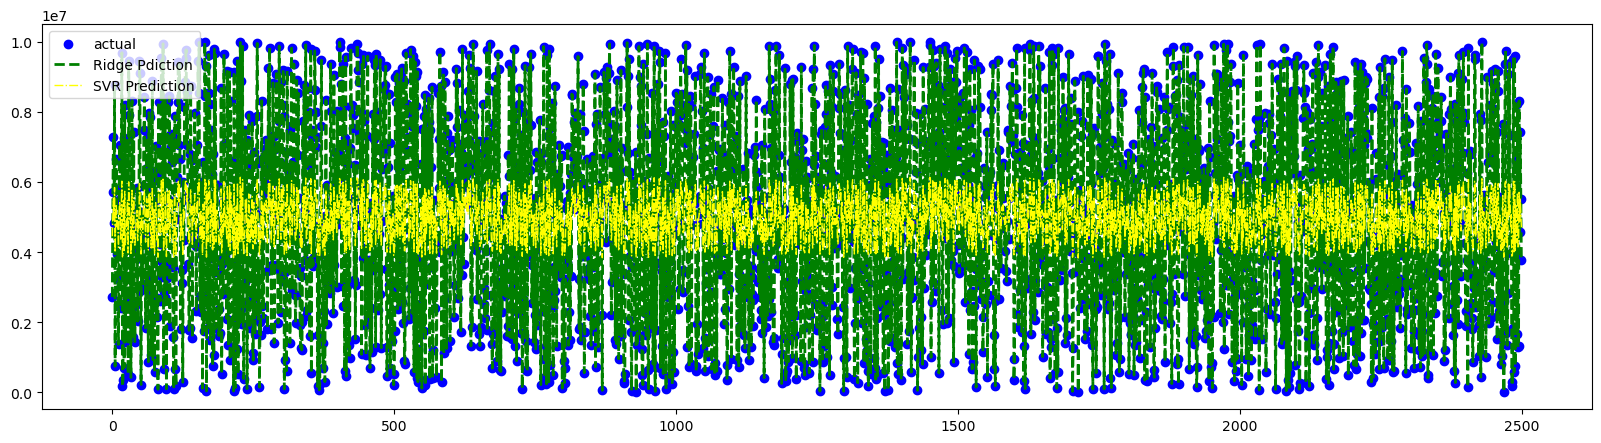

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
data_len = range(len(y_test_properti))
plt.scatter(data_len, df_results.properti, label="actual", color="blue")
plt.plot(data_len, df_results['Ridge Prediction'], label="Ridge Pdiction", color="green", linewidth=2, linestyle="dashed")
plt.plot(data_len, df_results['SVR Prediction'], label="SVR Prediction", color="yellow", linewidth=1, linestyle="-.")
plt.legend()
plt.show

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_ridge = mean_absolute_error(df_results['properti'], df_results['Ridge Prediction'])
rmse_ridge = np.sqrt(mean_squared_error(df_results['properti'], df_results['Ridge Prediction']))
ridge_feature_count = GSCV_RR.best_params_['feature_selection__k']

mae_svr = mean_absolute_error(df_results['properti'], df_results['SVR Prediction'])
rmse_svr = np.sqrt(mean_squared_error(df_results['properti'], df_results['SVR Prediction']))
svr_feature_count = GSCV_SVR.best_params_['feature_selection__k']

print(f"Ridge MAE: {mae_ridge}, Ridge RMSE:  {rmse_ridge}, Ridge Feature Count: {ridge_feature_count}")
print(f"SVR MAE: {mae_SVR}, SVR RMSE: {rmse_svr}, SVR Feature Count: {svr_feature_count}")

Ridge MAE: 1483.6207754128613, Ridge RMSE:  1915.1755879661425, Ridge Feature Count: 18
SVR MAE: 1929862.0391984528, SVR RMSE: 2231598.232102722, SVR Feature Count: 2


In [30]:
import pickle

best_model = GSCV_SVR.best_estimator_

with open('SVR_properti_model.pkl','wb') as f:
    pickle.dump(best_model, f)

print("Model terbaik berhasil disimpan ke 'SVR_properti_model.pkl'")

Model terbaik berhasil disimpan ke 'SVR_properti_model.pkl'
